In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline
plt.style.use('default')
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)
import pandas.tseries
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import autocorrelation_plot
from pandas import concat
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from multiprocessing import cpu_count
import itertools
plt.style.use('fivethirtyeight') 
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


/Users/kobidadush/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/kobidadush/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#Import the dataset 
Apple = yf.Ticker('AAPL')

In [3]:
dataset=Apple.history(period='max')

<AxesSubplot:xlabel='Date'>

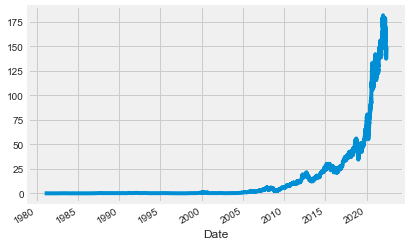

In [4]:
dataset['Close'].plot()

In [5]:
# The data set is from 2010 till 2017
Stock =dataset['2010':'2017']

In [6]:
Stock.drop(columns=['Open','Low','High','Volume','Dividends','Stock Splits'],inplace=True)

In [8]:
Stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=2013, freq=None)

In [9]:
Stock = Stock.resample('MS').mean()

In [10]:
#Checking for null 
print(Stock.isnull().sum())
print(Stock.isna().sum())

Close    0
dtype: int64
Close    0
dtype: int64


In [11]:
print(Stock.index.isna().sum())
print(Stock.index.isnull().sum())

0
0


<AxesSubplot:xlabel='Date'>

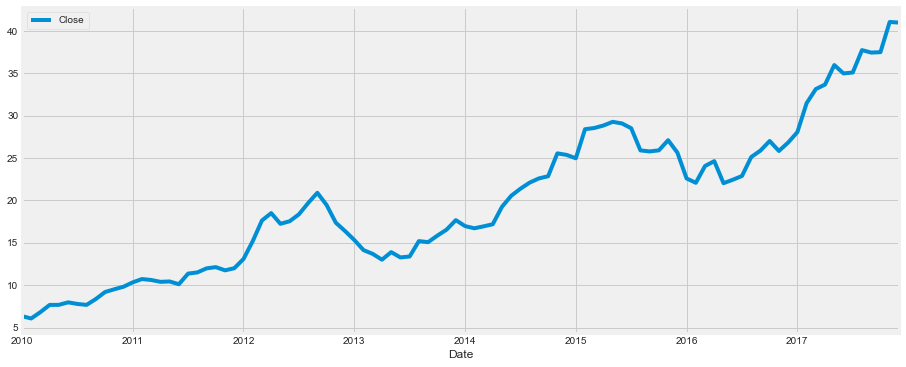

In [12]:
#Review the data 
Stock.plot(figsize=(14,6))

<AxesSubplot:>

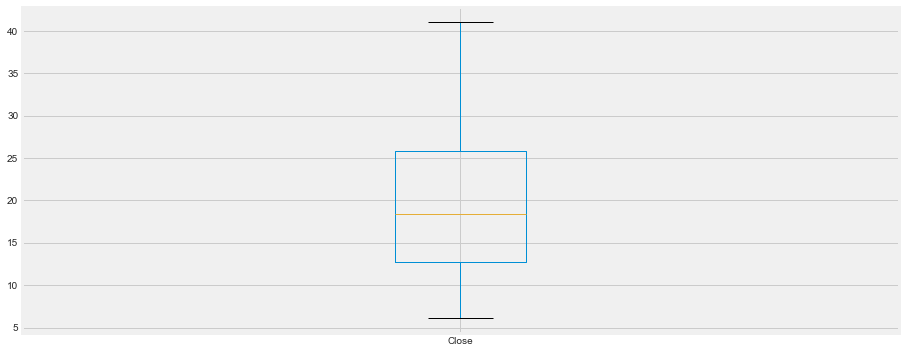

In [13]:
#Check for outliers 
Stock.boxplot(figsize=(14,6))

In [14]:
Stock['2013']

,Close
Date,
2013-01-01,15.336679
2013-02-01,14.138061
2013-03-01,13.691363
2013-04-01,13.007292
2013-05-01,13.900497
2013-06-01,13.273462
2013-07-01,13.386354
2013-08-01,15.201480
2013-09-01,15.076901


In [15]:
#Stationarity check
def Stationarity (TS):
    #import adfuller 
    from statsmodels.tsa.stattools import adfuller
    roll_mean = TS.rolling(window=8,center=False).mean()
    roll_std =TS.rolling(window=8,center=False).std()
    diff = TS.diff()
    #Dickey fuller test 
    dftest=adfuller(TS)

    #Plot Rolling statistics 
    fig=plt.figure(figsize=(12,6))
    orig= plt.plot(TS,color='blue',label='Original')
    mean=plt.plot(roll_mean,color='red',label='Rolling mean')
    std=plt.plot(roll_std,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation Apple Stock')
    plt.show(block=False)
    #print Dickey fulle test 
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
        print(dfoutput)
        return None


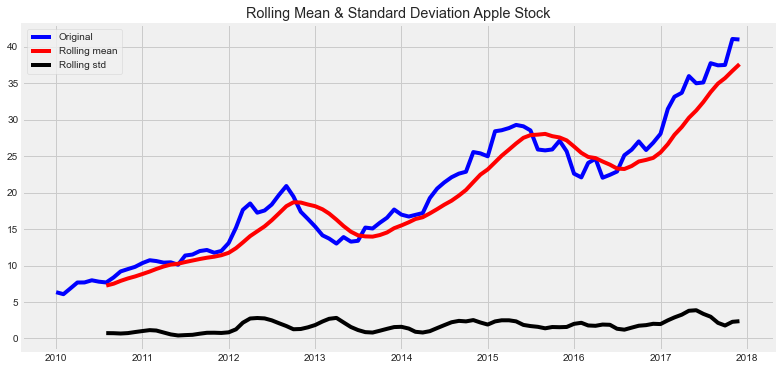

Results of Dickey-Fuller Test: 

Test Statistics                 0.148489
p-value                         0.969220
#Lags Used                      1.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
dtype: float64


In [16]:
Stationarity(Stock)

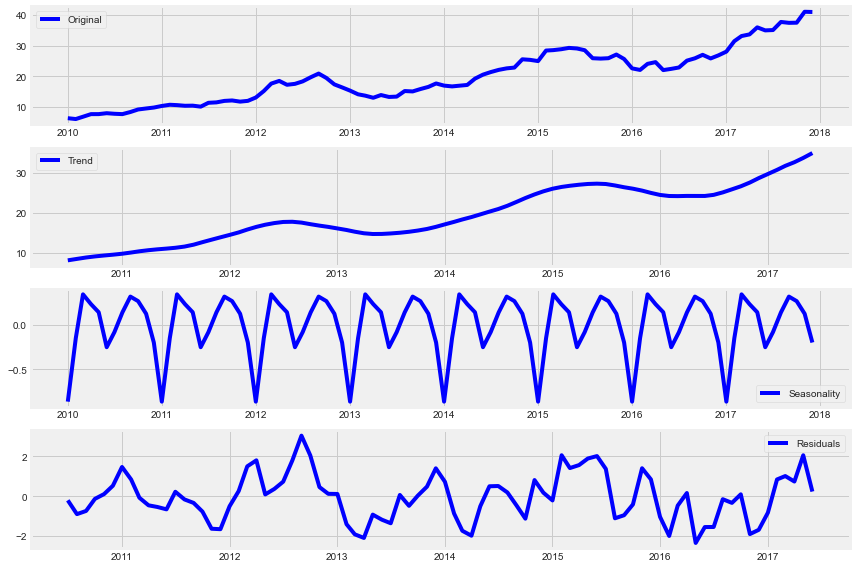

In [17]:
#decomposition...
rcParams['figure.figsize'] = 10, 6
decomposed_Apple_volume = sm.tsa.seasonal_decompose(Stock) # The frequncy is annual
trend = decomposed_Apple_volume.trend
seasonal = decomposed_Apple_volume.seasonal
residual = decomposed_Apple_volume.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Stock, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()


In [18]:
data_diff = Stock.diff(periods=1)


In [19]:
data_diff.dropna(inplace=True)

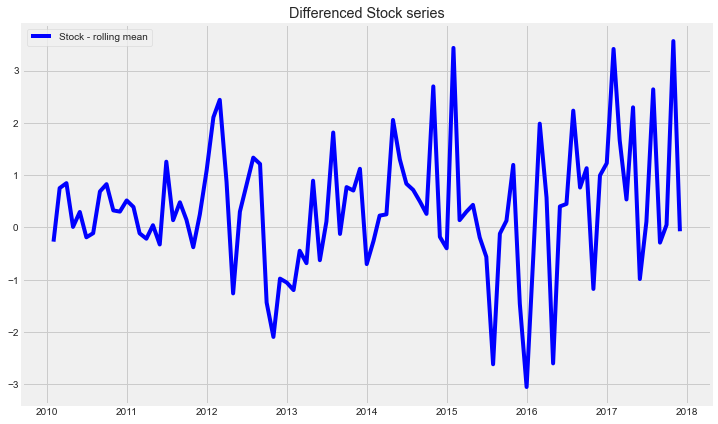

In [20]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Stock - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Stock series')
plt.show(block=False)

In [21]:
dftest = adfuller(data_diff) 

In [22]:
print('Results of Dickey-Fuller Test: \n')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistics               -7.955115e+00
p-value                        3.051973e-12
#Lags Used                     0.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


In [23]:
# Predicting High prices of Apple with SARIMAX

In [24]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [25]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(Stock,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45575D+00    |proj g|=  4.38431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.335D-06   4.456D+00
  F =   4.4557237354250185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =857.4989572016035
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.49912D+00    |proj g|=  1.03156D-02

At iterate   10    f=  2.49826D+00    |proj g|=  5.81952D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   5.820D-06   2.498D+00
  F =   2.4982581928430272     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =485.66557302586125
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47214D+00    |proj g|=  5.47637D-01

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72332D+00    |proj g|=  5.43381D-01

At iterate    5    f=  2.49498D+00    |proj g|=  8.72788D-02

At iterate   10    f=  2.34794D+00    |proj g|=  2.61801D-02

At iterate   15    f=  2.34777D+00    |proj g|=  2.07964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     23      1     0     0   7.836D-06   2.348D+00
  F =   2.3477710815475290     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.30643D+00    |proj g|=  1.51324D-01

At iterate   10    f=  2.30441D+00    |proj g|=  7.87563D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     27      1     0     0   4.750D-06   2.304D+00
  F =   2.3044134534451852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =448.4473830614756
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98155D+00    |proj g|=  5.23664D-01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.97011D+00    |proj g|=  1.21130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     49      1     1     0   1.211D-04   1.970D+00
  F =   1.9701083179327750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =386.2607970430928
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39932D+00    |proj g|=  4.68330D-01

At iterate    5    f=  2.20793D+00    |proj g|=  3.70622D-01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.02977D+00    |proj g|=  2.11562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     21      1     0     0   8.021D-06   2.030D+00
  F =   2.0297453432164660     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =397.7111058975615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62404D+00    |proj g|=  1.61701D-02

           * * *

Tit   = total number of iterations
Tnf   = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.45863D+00    |proj g|=  3.84178D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   1.047D-07   1.459D+00
  F =   1.4586187430052000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =286.0547986569984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44729D+00    |proj g|=  4.00964D-06

           * * *

Tit   = total number of iterations
Tnf   = 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =332.27614886533047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37254D+00    |proj g|=  2.29137D-01

At iterate    5    f=  1.28254D+00    |proj g|=  1.41202D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   2.879D-06   1.283D+00
  F =   1.2825401773499654     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =252.24771

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.42646D+00    |proj g|=  7.79876D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   7.799D-06   1.426D+00
  F =   1.4264632374178623     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =279.88094158422956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35484D+00    |proj g|=  1.96832D-01

At iterate    5    f=  1.27642D+00    |proj g|=  1.05274D-02

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.42416D+00    |proj g|=  7.90210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   3.213D-07   1.424D+00
  F =   1.4241579309174215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =279.4383227361449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76721D+00    |proj g|=  5.49803D-05

           * * *

Tit   = total number of iterations
Tnf   = 

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  1.50559D+00    |proj g|=  5.18744D-01

At iterate   10    f=  1.47080D+00    |proj g|=  3.19491D-02

At iterate   15    f=  1.45093D+00    |proj g|=  6.24372D-01

At iterate   20    f=  1.42350D+00    |proj g|=  7.70650D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     57      1     0     0   1.522D-03   1.424D+00
  F =   1.4235014893154168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =281.31228594856003
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.33325D+00    |proj g|=  1.71747D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   6.045D-06   1.333D+00
  F =   1.3332393610068312     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =263.98195731331157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56261D+00    |proj g|=  2.29715D-02

At iterate    5    f=  1.56232D+00    |proj g|=  1.62883D-01

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.41060D+00    |proj g|=  2.74130D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   2.391D-06   1.411D+00
  F =   1.4106038779762875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =278.8359445714472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55437D+00    |proj g|=  4.89796D-01

At iterate    5    f=  1.51218D+00    |proj g|=  3.55777D-01


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46599D+00    |proj g|=  1.90361D-01

At iterate    5    f=  1.42541D+00    |proj g|=  4.16731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   2.859D-05   1.425D+00
  F =   1.4253869130215238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =281.67428730013256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   5.426D-06   1.296D+00
  F =   1.2955231626961337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =258.7404472376577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59102D+00    |proj g|=  6.48666D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of s

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.43066D+00    |proj g|=  4.49618D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   4.496D-07   1.431D+00
  F =   1.4306591438769940     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =280.68655562438283
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43390D+00    |proj g|=  7.45895D-02

At iterate    5    f=  1.42981D+00    |proj g|=  1.30993D-02

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =257.90050126842857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57304D+00    |proj g|=  2.11832D-02

At iterate    5    f=  1.57145D+00    |proj g|=  2.95066D-02

At iterate   10    f=  1.57095D+00    |proj g|=  1.07467D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   6.331D-07   1.571D+00
  F =   1.5709463620784898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.28663D+00    |proj g|=  5.87668D-03

At iterate   10    f=  1.28396D+00    |proj g|=  8.97259D-02

At iterate   15    f=  1.27626D+00    |proj g|=  4.22406D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   1.031D-06   1.276D+00
  F =   1.2762224851244028     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =253.03471714388536
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =281.1802878540252
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41545D+00    |proj g|=  5.88214D-02

At iterate    5    f=  1.40914D+00    |proj g|=  2.43524D-02

At iterate   10    f=  1.40812D+00    |proj g|=  6.36920D-03

At iterate   15    f=  1.40808D+00    |proj g|=  6.35936D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   6.359D-08   1.408D+00
  F =   1.4080792482050457     


 This problem is unconstrained.


In [26]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic        252.247714
Name: 27, dtype: object

In [27]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Stock, 
                                        order=(1, 0, 0), 
                                        seasonal_order=(0,0,0,12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59309D+00    |proj g|=  1.55251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.552D-03   1.593D+00
  F =   1.5930946919200972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0170      0.005    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


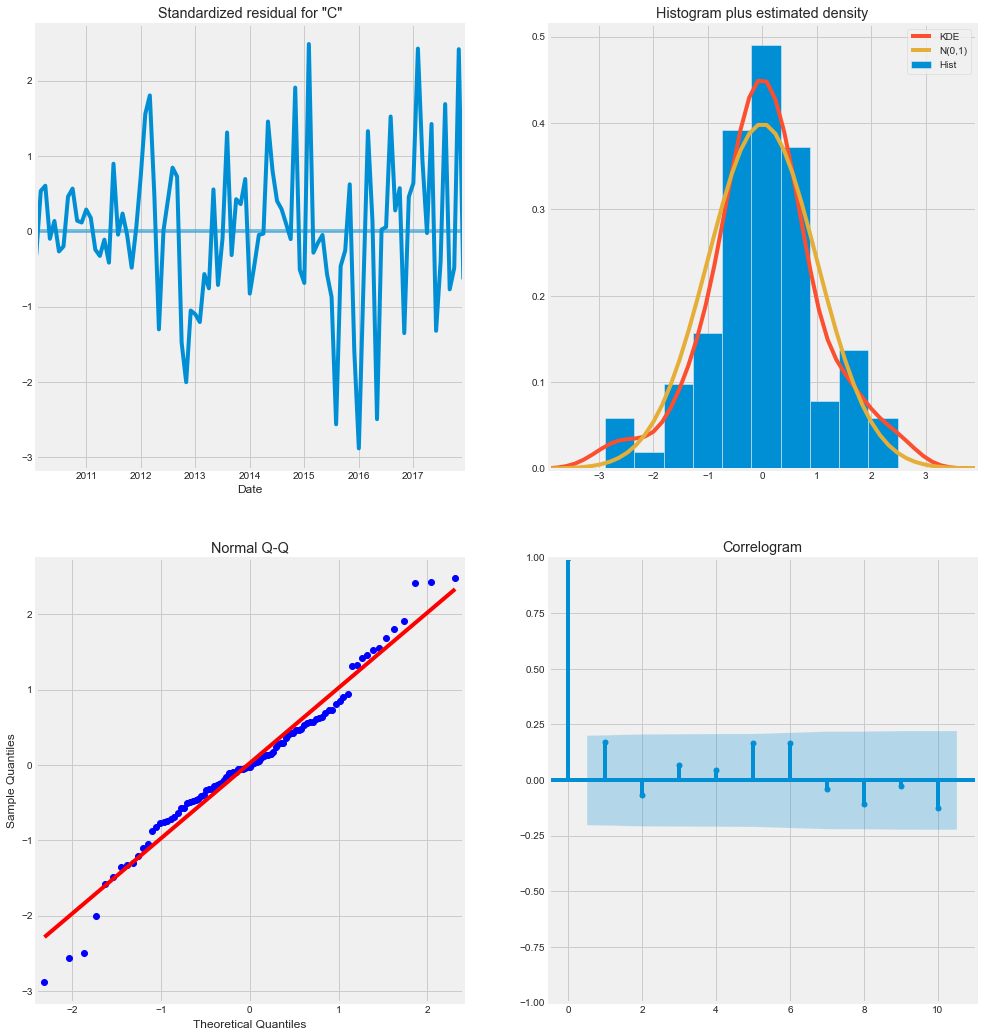

In [28]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [29]:
# Get predictions starting from 2013 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False,full_results=True)
pred_conf = pred.conf_int()

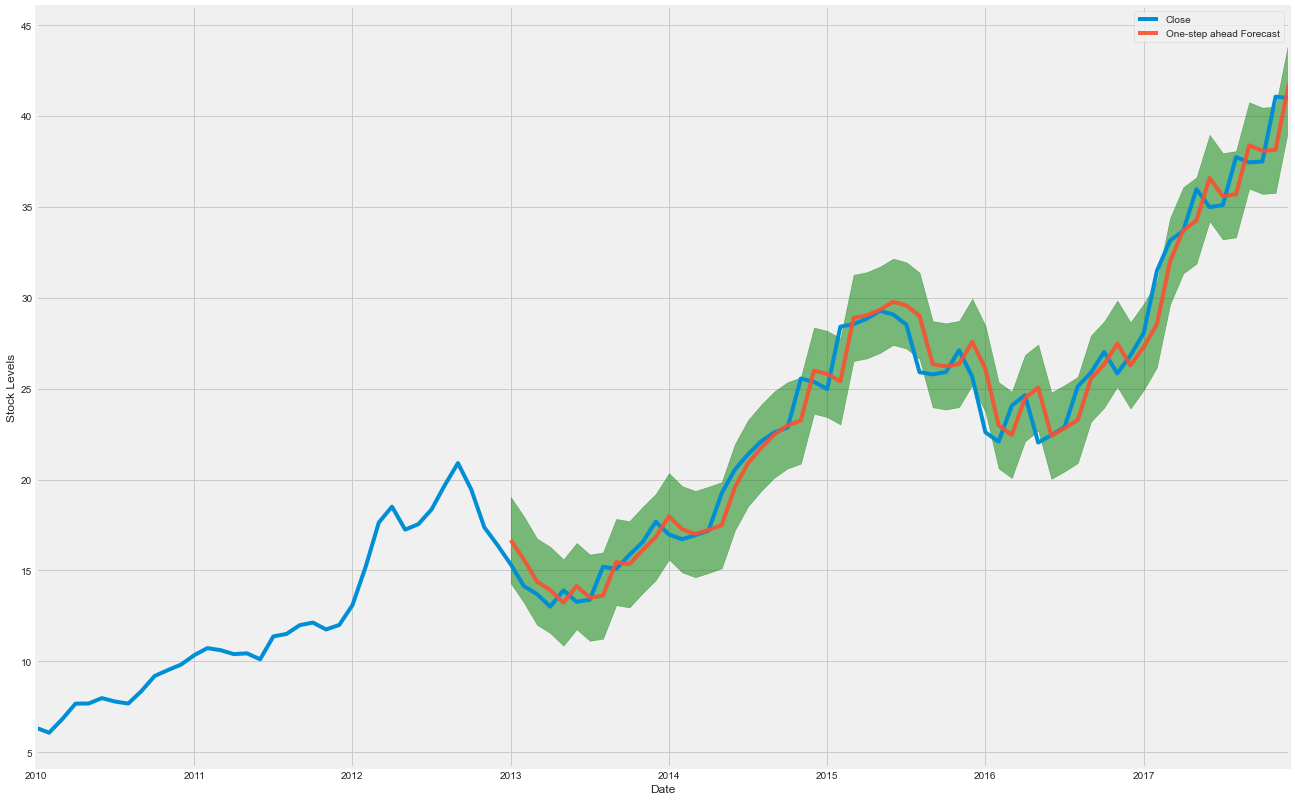

In [30]:
rcParams['figure.figsize'] = 20, 14

# Plot observed values
ax = Stock['2010':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Stock Levels')
plt.legend()

plt.show()

In [31]:
# Get the real and predicted values
stock_forecasted = pred.predicted_mean
stock_truth = Stock['2013-01-01':]['Close']

# Compute the mean square error
mse = ((stock_forecasted - stock_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 1.83


In [32]:
# Forecasting 

In [33]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

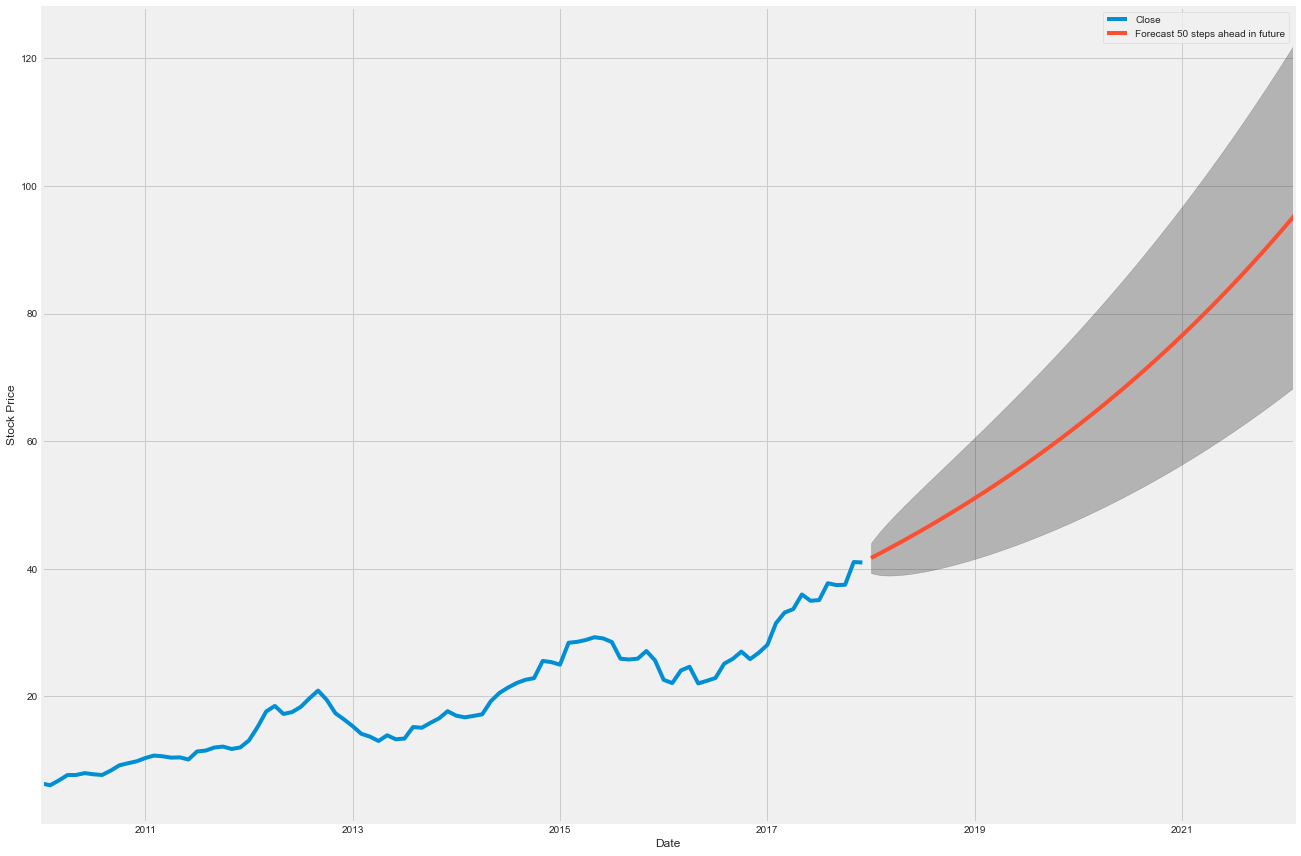

In [34]:
# Plot future predictions with confidence intervals
ax = Stock.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast 50 steps ahead in future')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')

plt.legend()
plt.show()